In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings('ignore')

Column Name	Description	Type
Fiscal Year - Fiscal Year

Payroll Number- Payroll Number

Agency Name - The Payroll agency that the employee works for

Last Name - Last name of employee

First Name - First name of employee

Mid Init - Middle initial of employee

Agency Start Date - Date which employee began working for their current agency

Work Location Borough - Borough of employee's primary work location

Title Description - Civil service title description of the employee

Leave Status as of June 30 - Status of employee as of the close of the relevant fiscal year: Active, Ceased, or On Leave



Base Salary	- Base Salary assigned to the employee

Pay Basis - Lists whether the employee is paid on an hourly, per diem or annual basis

Regular Hours - Number of regular hours employee worked in the fiscal year

Regular Gross Paid - The amount paid to the employee for base salary during the fiscal year

OT Hours - Overtime Hours worked by employee in the fiscal year

Total OT Paid - Total overtime pay paid to the employee in the fiscal year

Total Other Pay	- Includes any compensation in addition to gross salary and overtime pay, ie Differentials, lump sums, uniform allowance, meal allowance, retroactive pay increases, settlement amounts, and bonus pay, if applicable.


In [2]:
# Bringing the data into code and examining the shape 
nyc_df = pd.read_csv('nyc_salary.csv')

nyc_df.shape

(4496767, 17)

In [5]:
# Examining the info of nyc salaries
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496767 entries, 0 to 4496766
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 583.2+ MB


In [5]:
# examining the columns to see how I want to explore the data
nyc_df.head(-5)

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496757,2021,DEPT OF ED PEDAGOGICAL,IN,PARIMA,09/06/2016,MANHATTAN,TEACHER-REG SUB,CEASED,124909.00,per Annum,0.0,-51156.68,0.0,0.0,-16.93
4496758,2021,DEPT OF ED HRLY SUPPORT STAFF,FRATIANNI,MARYANN,04/27/1999,MANHATTAN,F/T SCHOOL AIDE,CEASED,17.00,per Hour,0.0,-57256.00,0.0,0.0,5814.70
4496759,2021,DEPT OF ED PEDAGOGICAL,LAMBERT,MARISA,09/06/2005,MANHATTAN,ASSISTANT PRINCIPAL,ON LEAVE,130351.00,per Annum,0.0,-36364.44,0.0,0.0,-15369.52
4496760,2021,DEPT OF ED HRLY SUPPORT STAFF,RIVERA,SARAH,09/02/1997,MANHATTAN,F/T SCHOOL AIDE,CEASED,17.04,per Hour,0.0,-58284.17,0.0,0.0,4347.24


In [11]:
nyc_df['Pay Basis'].value_counts()

per Annum          2684554
per Day            1002261
per Hour            789496
Prorated Annual      20456
Name: Pay Basis, dtype: int64

In [3]:
#Dropped Payroll Number and Middle initial so far becuase I do not see them affected EDA

nyc_df.drop(columns=['Payroll Number', 'Mid Init'], inplace=True)
nyc_df.head()

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


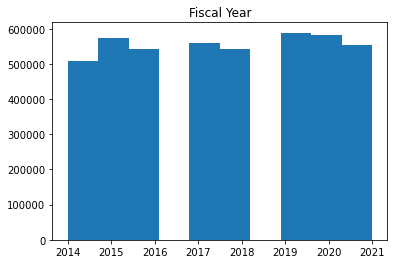

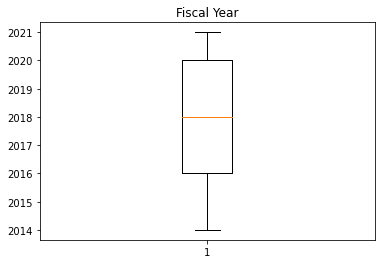

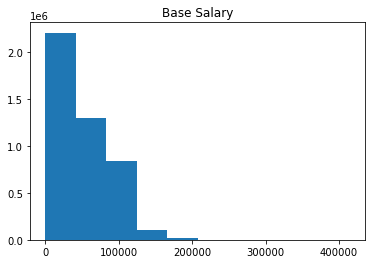

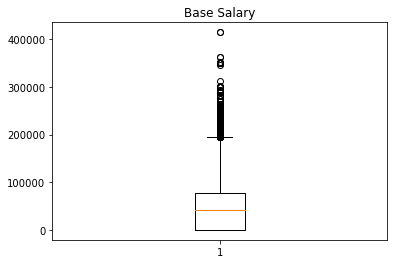

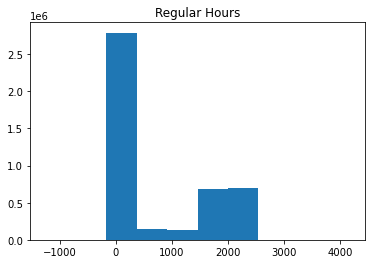

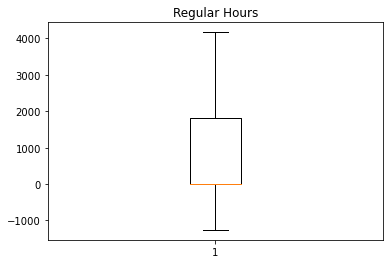

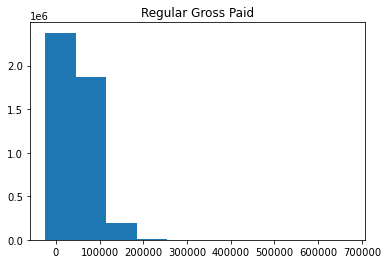

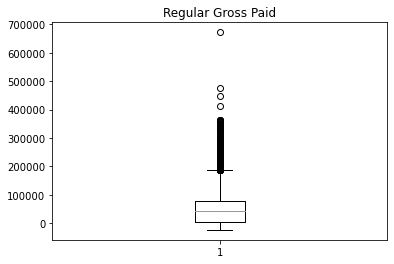

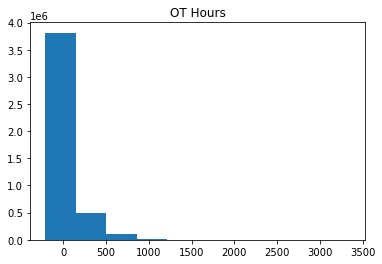

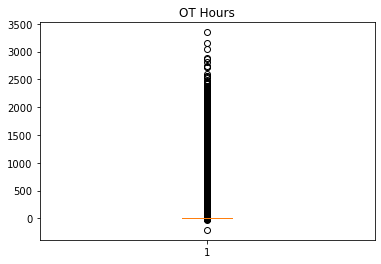

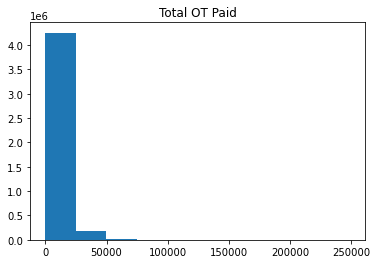

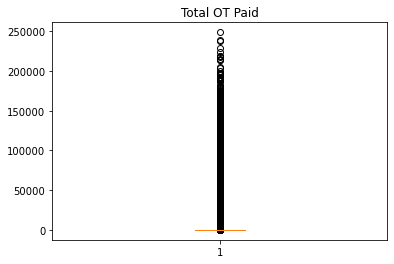

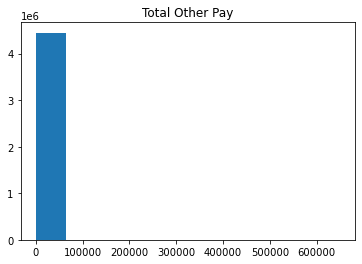

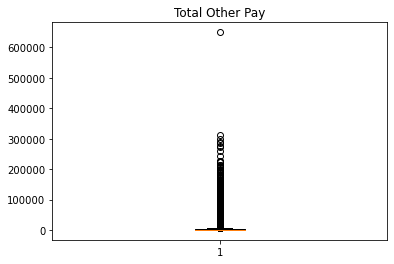

In [17]:
num_cols = nyc_df.columns[[(nyc_df[col].dtype == 'int64') or (nyc_df[col].dtype == 'float64') for col in nyc_df.columns]]
for col in num_cols:
    plt.hist(nyc_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(nyc_df[col])
    plt.title(col)
    plt.show()

## Checking for negative values

I noticed a lot of negative values that are throwing off the graphs. Looking at

In [13]:
# checking for negative values

(nyc_df['Total Other Pay'] < 0).sum().sum()

# total other pay with negative value is 45,973

0

In [15]:
## Check in how many negative OT pay there is

(nyc_df['Total OT Paid'] < 0).sum().sum()

## That sum is 1700


0

In [16]:
(nyc_df['Regular Gross Paid'] <= 0).sum().sum()

144656

In [19]:
(nyc_df['Regular Hours'] <= 0).value_counts()

True     2553560
False    1895816
Name: Regular Hours, dtype: int64

In [21]:
(nyc_df['Pay Basis'] == 'per Hour').value_counts()

False    3661187
True      788189
Name: Pay Basis, dtype: int64

In [18]:
nyc_df['Leave Status as of June 30'].value_counts()

ACTIVE                 3828710
CEASED                  574695
ON LEAVE                 48368
SEASONAL                 37345
ON SEPARATION LEAVE       7649
Name: Leave Status as of June 30, dtype: int64

In [14]:
nyc_df[nyc_df['Regular Gross Paid'] <= 0]

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
85,2020,OFFICE OF EMERGENCY MANAGEMENT,MURILLO,RUDY,08/01/2011,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,90737.0,per Annum,0.0,0.00,0.0,0.0,39464.19
88,2020,OFFICE OF EMERGENCY MANAGEMENT,JENKINS,JONATHAN,08/13/2007,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,151131.0,per Annum,0.0,0.00,0.0,0.0,31010.35
103,2020,OFFICE OF EMERGENCY MANAGEMENT,STRICKLAND,BRANCH,10/28/2012,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,136887.0,per Annum,0.0,0.00,0.0,0.0,14860.74
113,2020,OFFICE OF EMERGENCY MANAGEMENT,ROSTERN,STEVEN,11/13/2017,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,81350.0,per Annum,0.0,0.00,0.0,0.0,7422.85
114,2020,OFFICE OF EMERGENCY MANAGEMENT,ALER,JEFFREY,03/19/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,CEASED,83500.0,per Annum,0.0,0.00,0.0,0.0,6658.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496762,2021,DEPT OF ED PEDAGOGICAL,BURGAN,WYLIE,10/01/1986,OTHER,ASSISTANT PRINCIPAL,CEASED,124800.0,per Annum,0.0,0.00,0.0,0.0,-71916.37
4496763,2021,BRONX DISTRICT ATTORNEY,SIMMONS,NATHANIEL,07/02/1990,BRONX,SPECIAL ASSISTANT TO THE DISTRICT ATTORNEY,CEASED,110000.0,per Annum,-70.0,-4207.65,0.0,0.0,-75440.00
4496764,2021,DEPT OF ED PEDAGOGICAL,ROBERTSON,BRENDA,10/15/1985,OTHER,ASSISTANT PRINCIPAL,CEASED,126061.0,per Annum,0.0,0.00,0.0,0.0,-87436.13
4496765,2021,DEPT OF ED PEDAGOGICAL,BECKHAM,DOLORES,11/04/1977,OTHER,PRINCIPAL,CEASED,159609.0,per Annum,0.0,0.00,0.0,0.0,-97608.11


After noticing the negative values. I saw that they may be linked to leave status. Looking at the data dictionary, leave status is whether an individual is currently employed, ceased or no longer employed with the city(they cease to work there anymore). Instead of dropping the values less than or equal to 0, I will replace them with their base salary

In [6]:
nyc_df['Regular Gross Paid'] = np.where((nyc_df['Leave Status as of June 30'] == 'CEASED') | (nyc_df['Leave Status as of June 30'] == 'ON LEAVE'), nyc_df['Base Salary'], nyc_df['Regular Gross Paid'])

nyc_df.head(-5)

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496757,2021,DEPT OF ED PEDAGOGICAL,IN,PARIMA,09/06/2016,MANHATTAN,TEACHER-REG SUB,CEASED,124909.00,per Annum,0.0,124909.00,0.0,0.0,-16.93
4496758,2021,DEPT OF ED HRLY SUPPORT STAFF,FRATIANNI,MARYANN,04/27/1999,MANHATTAN,F/T SCHOOL AIDE,CEASED,17.00,per Hour,0.0,17.00,0.0,0.0,5814.70
4496759,2021,DEPT OF ED PEDAGOGICAL,LAMBERT,MARISA,09/06/2005,MANHATTAN,ASSISTANT PRINCIPAL,ON LEAVE,130351.00,per Annum,0.0,130351.00,0.0,0.0,-15369.52
4496760,2021,DEPT OF ED HRLY SUPPORT STAFF,RIVERA,SARAH,09/02/1997,MANHATTAN,F/T SCHOOL AIDE,CEASED,17.04,per Hour,0.0,17.04,0.0,0.0,4347.24


In [12]:
nyc_df = nyc_df[nyc_df['Total Other Pay'] >= 0]

nyc_df.head(-5)

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496726,2021,DEPT OF ED PEDAGOGICAL,HALE,NATALIE,09/03/2013,MANHATTAN,TEACHER SPECIAL EDUCATION,ON LEAVE,85258.0,per Annum,0.0,85258.00,0.0,0.0,1867.86
4496727,2021,DEPT OF ED PARA PROFESSIONALS,PEREZ,MARIA,03/18/2008,MANHATTAN,ANNUAL ED PARA,CEASED,44975.0,per Annum,0.0,44975.00,0.0,0.0,2504.00
4496733,2021,DEPT OF ED PEDAGOGICAL,FINDLEY,BERNARD,09/18/1985,MANHATTAN,TEACHER,CEASED,124909.0,per Annum,0.0,124909.00,0.0,0.0,2854.22
4496736,2021,DEPT OF ED PEDAGOGICAL,GARCIA,VANESSA,09/04/2012,MANHATTAN,SCHOOL PSYCHOLGIST,CEASED,97720.0,per Annum,0.0,97720.00,0.0,0.0,15588.30


In [16]:
nyc_df= nyc_df[nyc_df['Total OT Paid'] >= 0]

nyc_df.head(-5)

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
1,2020,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
2,2020,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
3,2020,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
4,2020,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496726,2021,DEPT OF ED PEDAGOGICAL,HALE,NATALIE,09/03/2013,MANHATTAN,TEACHER SPECIAL EDUCATION,ON LEAVE,85258.0,per Annum,0.0,85258.00,0.0,0.0,1867.86
4496727,2021,DEPT OF ED PARA PROFESSIONALS,PEREZ,MARIA,03/18/2008,MANHATTAN,ANNUAL ED PARA,CEASED,44975.0,per Annum,0.0,44975.00,0.0,0.0,2504.00
4496733,2021,DEPT OF ED PEDAGOGICAL,FINDLEY,BERNARD,09/18/1985,MANHATTAN,TEACHER,CEASED,124909.0,per Annum,0.0,124909.00,0.0,0.0,2854.22
4496736,2021,DEPT OF ED PEDAGOGICAL,GARCIA,VANESSA,09/04/2012,MANHATTAN,SCHOOL PSYCHOLGIST,CEASED,97720.0,per Annum,0.0,97720.00,0.0,0.0,15588.30


Further clean up from assigning regular pay to base base if it was negative. This time i dropped the rows that contains negative values in total other pay and total ot pay